In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=["target"])

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

### Scaling data
Considering the above data it is required to scale the data, we will use standard scalar. 

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test =  scaler.transform(X_test)

In [15]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 119us/sample - loss: 0.8427 - val_loss: 0.4339
Epoch 2/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4073 - val_loss: 0.3801
Epoch 3/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3759 - val_loss: 0.3897
Epoch 4/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3594 - val_loss: 0.4278
Epoch 5/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3457 - val_loss: 0.4012
Epoch 6/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3457 - val_loss: 0.3496
Epoch 7/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3325 - val_loss: 0.3404
Epoch 8/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3214 - val_loss: 0.3252
Epoch 9/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.31

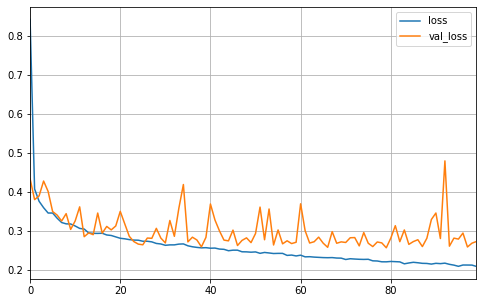

In [16]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [19]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

5160/5160 [==============================] - 1s 112us/sample - loss: 0.2703


In [20]:
y_pred

array([[0.5706705],
       [1.0950773],
       [4.812077 ],
       [2.6741872],
       [2.707638 ]], dtype=float32)

In [21]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = tf.keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 3s 267us/sample - loss: 0.1865 - val_loss: 0.2629
Epoch 2/10
11610/11610 [==============================] - 2s 171us/sample - loss: 0.1839 - val_loss: 0.2596
Epoch 3/10
11610/11610 [==============================] - 2s 165us/sample - loss: 0.1825 - val_loss: 0.2605
Epoch 4/10
11610/11610 [==============================] - 2s 143us/sample - loss: 0.1821 - val_loss: 0.2599
Epoch 5/10
11610/11610 [==============================] - 2s 162us/sample - loss: 0.1814 - val_loss: 0.2611
Epoch 6/10
11610/11610 [==============================] - 2s 159us/sample - loss: 0.1811 - val_loss: 0.2602
Epoch 7/10
11610/11610 [==============================] - 2s 168us/sample - loss: 0.1806 - val_loss: 0.2631
Epoch 8/10
11610/11610 [==============================] - 2s 162us/sample - loss: 0.1804 - val_loss: 0.2610
Epoch 9/10
11610/11610 [==============================] - 2s 171us/sample - loss: 0.180

In [22]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 275us/sample - loss: 0.1802 - val_loss: 0.2598
Epoch 2/100
11610/11610 [==============================] - 2s 152us/sample - loss: 0.1795 - val_loss: 0.2607
Epoch 3/100
11610/11610 [==============================] - 2s 153us/sample - loss: 0.1793 - val_loss: 0.2588
Epoch 4/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.1792 - val_loss: 0.2636
Epoch 5/100
11610/11610 [==============================] - 2s 157us/sample - loss: 0.1792 - val_loss: 0.2591
Epoch 6/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.1788 - val_loss: 0.2606
Epoch 7/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.1786 - val_loss: 0.2613
Epoch 8/100
11610/11610 [==============================] - 2s 174us/sample - loss: 0.1784 - val_loss: 0.2581
Epoch 9/100
11610/11610 [==============================] - 2s 162us/sample - lo

### Early stopping 

This will help to early stop the model to avoid the waste of resources. 

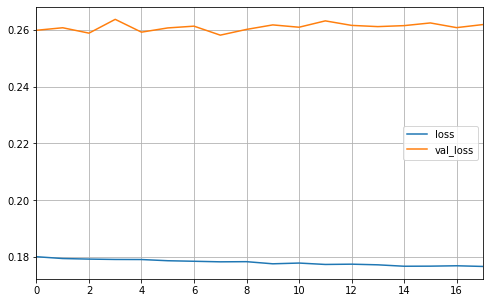

In [23]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.gca().set_ylim(0, 1)
plt.grid(True)